# Homework 04

## Due Tuesday, March 1st

For all of the plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the default jet (rainbow) colormap!

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [un t](../data/merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

TypeError: 'module' object is not callable

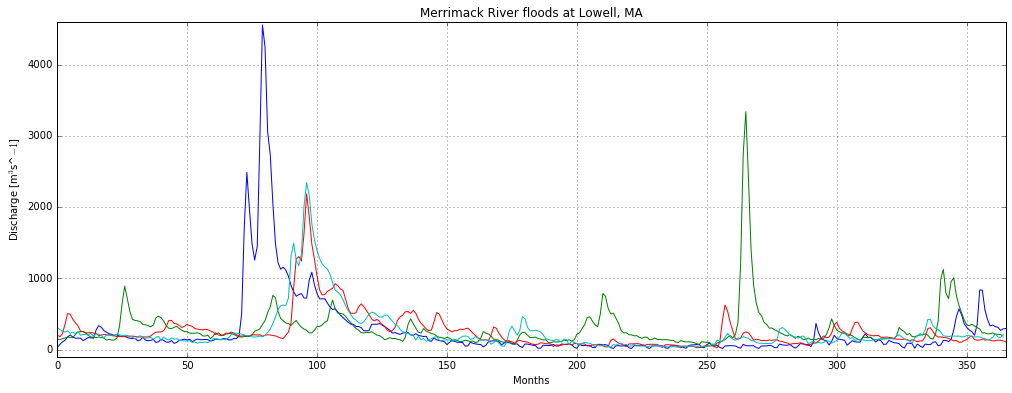

In [4]:
f= open('C:/Users/Scott/Documents/GitHub/Homework-Repository/merrimack_discharge.dat')
f.seek(0)
line=f.readlines()
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import datetime 
from datetime import date,datetime
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator,DateFormatter


Y1936=[]
Y1938=[]
Y1960=[]
Y1987=[]
for i in line:
    data=i.split('\t')
    if not data: continue
    if len(data)<3:continue
    elif data[2].split('-')[0]=='1936':
        Y1936.append(float(data[3])*0.0283168)
    elif data[2].split('-')[0]=='1938':
        Y1938.append(float(data[3])*0.0283168)
    elif data[2].split('-')[0]=='1960':
        Y1960.append(float(data[3])*0.0283168)
    elif data[2].split('-')[0]=='1987':
        Y1987.append(float(data[3])*0.0283168)
        
fig = plt.figure(figsize=(17, 6))  
ax = fig.add_subplot(111)
ax.plot(Y1936)
ax.plot(Y1938)
ax.plot(Y1960)
ax.plot(Y1987)
ax.set_xlim(0,365)
ax.set_ylim(-100,4600)
ax.set_xlabel('Months')
ax.set_ylabel('Discharge [m$^3$s^$-1$]')
ax.set_title('Merrimack River floods at Lowell, MA')
ax.grid(True)
date1 = dates.datetime(2009, 1, 1)
date2 = dates.datetime(2009, 12, 31)
delta1 = dt.timedelta(days=1)
dates1 = dates.drange(date1, date2, delta1)
months = MonthLocator(range(1, 12), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b")
ax.plot_date(dates, opens, '-')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()


### 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

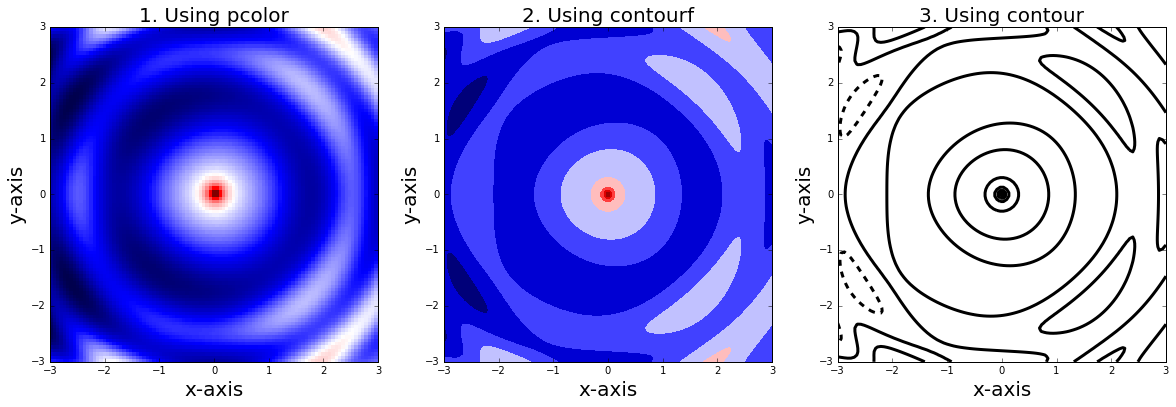

In [7]:
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20,6)) 

a = axes[0].pcolor(X, Y, Z, cmap='seismic') 
axes[0].set_title('1. Using pcolor', size=20)
axes[0].set_xlabel('x-axis', size=20)
axes[0].set_ylabel('y-axis', size=20)
       
b = axes[1].contourf(X, Y, Z, cmap='seismic') 
axes[1].set_title('2. Using contourf', size=20)
axes[1].set_xlabel('x-axis', size=20)
axes[1].set_ylabel('y-axis', size=20)

c = axes[2].contour(X, Y, Z, colors='k', linewidths=3) 
axes[2].set_title('3. Using contour', size=20)
axes[2].set_xlabel('x-axis', size=20)
axes[2].set_ylabel('y-axis', size=20)



### 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

AttributeError: 'Figure' object has no attribute 'scatter'

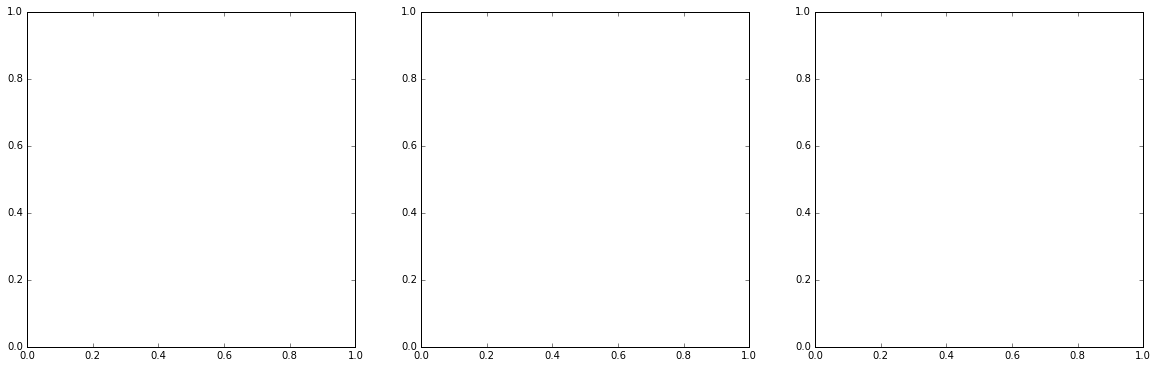

In [10]:
fi = open('C:/Users/Scott/Documents/GitHub/python4geosciences/data/MCH/m1001a.cnv2')


axes = plt.subplots(1, 3, sharey=False, figsize=(20,6))

axes[0].scatter(temp, salinity, s=100, c='black')
axes[0].set_title('1. Temperature vs. Salinity', size=20)
axes[0].set_ylabel('Salinity (psu)', size=18)
axes[0].set_xlabel('Temperature(°C)', size=18)
axes[0].grid()

a = axes[1].scatter(temp, salinity, c=depth, cmap='seismic', s=100, linewidths=1)
axes[1].set_title('2. Temperature vs. Salinity', size=20)
axes[1].set_ylabel('Salinity (psu)', size=18)
axes[1].set_xlabel('Temperature(°C)', size=18)
axes[1].grid()
cb = plt.colorbar(a, ax=axes[1])
cb.set_label('Depth (m)', fontsize=18)

axes[2].scatter(temp, salinity, c=depth, cmap='magma', s=depth, linewidths=1)
axes[2].set_title('3. Temperature vs. Salinity', size=20)
axes[2].set_ylabel('Salinity (psu)', size=18)
axes[2].set_xlabel('Temperature(°C)', size=18)
axes[2].grid()


### 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

In [7]:
import decimal
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt
from decimal import *
from scipy.stats import norm

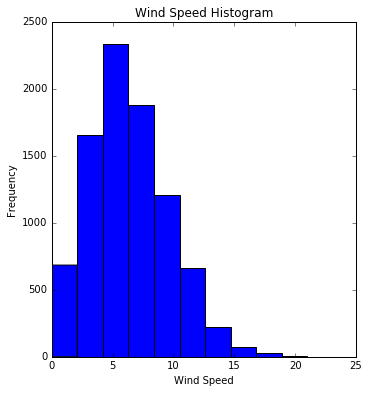

In [8]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(wind_speed, bins=10)
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Frequency')
ax1.set_title('Wind Speed Histogram')

# I know that the probability distribution is right-skewed. 


In [12]:
mean = (wind_speed)
lines=[wind_speed]
Long = len(lines)
Maxim = max(lines) 
Minim = min(lines) 
av = np.mean(lines) 
StDev = np.std(lines)
x = np.linspace(Minim, Maxim, Long)
ax.plot(x, (x, av, StDev),'r-', lw=3, alpha=0.9, label='right-skew')

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (8755,)